# Continuous LLM Quickstart

This notebook showcases how to launch our experiments in a seamless manner. For the script versions, refer to `./continuity_scripts`

In [1]:
import sys
sys.path.append('..')

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from continuity_tests.duration_shrink import run_counting_experiment

model_name = 'meta-llama/Meta-Llama-3-8B'

current_model = AutoModelForCausalLM.from_pretrained(model_name)
current_tokenizer = AutoTokenizer.from_pretrained(model_name)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

## Counting Apples

The "apple apple apple apple" example from the paper.

In [3]:
repetitions = 4
word = 'apple'
category_with_article = 'a fruit'

sentence = f'Question: In the sentence "{" ".join([word] * repetitions)}", how many times is {category_with_article} mentioned? Reply with a single-digit number\nAnswer: '

In [4]:
interesting_outputs = {}

for i in range(0, repetitions + 1):
    interesting_outputs[str(i)] = str(i)

interesting_outputs['Other Digits'] = [str(i) for i in range(10) if str(i) not in interesting_outputs]

shrink_start = word
shrink_end = word

run_counting_experiment(current_model, current_tokenizer, sentence, None, shrink_start, shrink_end, interesting_outputs, './out/apples', 'Duration Factor', legend=True)

['', 'Question', ':', ' In', ' the', ' sentence', ' "', 'apple', ' apple', ' apple', ' apple', '",', ' how', ' many', ' times', ' is', ' a', ' fruit', ' mentioned', '?', ' Reply', ' with', ' a', ' single', '-digit', ' number', '\n', 'Answer', ':', ' ']
7 10
['apple', ' apple', ' apple', ' apple']
{'0': [21026, 17416, 15500, 27309, 13679, 4364, 11209, 12226, 5067, 7699, 12166, 24222, 22679, 410, 7467, 21278, 6843, 1954, 17248, 128255, 11711, 128215, 22393, 16193, 10866, 128106, 9870, 2031, 23904, 128095, 27311, 18518, 7507, 13506, 20615, 128107, 13104, 12448, 17252, 20417, 19666, 7007, 22397, 16037, 21602, 128105, 18807, 128245, 13897, 17735, 15794, 13364, 25307, 22876, 26956, 12060, 1049, 21949, 15, 28384, 11436, 19104, 21360, 14408, 679, 21138, 18048, 21996, 15830, 21741, 19319, 14649, 20078, 128206, 15633, 2304, 23439, 128209, 128109, 5245, 128110, 2636, 22000, 8273, 21056, 16745, 16217, 27325, 19146, 23102, 8848, 7854, 24130, 20436, 128211, 128195, 21474, 14777, 24824, 128108, 20772

Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


2 0.42985600233078003
{}
Attention scaling: 1.0
2 0.420553058385849
{}
Attention scaling: 1.0
1 0.4137061834335327
{}
Attention scaling: 1.0
1 0.563194751739502
{}
Attention scaling: 1.0
1 0.7258656620979309
{}
Attention scaling: 1.0
1 0.8146129250526428
{}
Attention scaling: 1.0
1 0.8546314239501953
{}
Attention scaling: 1.0
1 0.8750698566436768
{}
Attention scaling: 1.0
1 0.8869304060935974
{}
Attention scaling: 1.0
1 0.8941872119903564
{}
Attention scaling: 1.0
1 0.8985670804977417
{}
Attention scaling: 1.0
1 0.9009993076324463
{}
Attention scaling: 1.0
1 0.9020745754241943
{}
Attention scaling: 1.0
1 0.9021741151809692
{}
Attention scaling: 1.0
1 0.9014942049980164
{}
Attention scaling: 1.0
1 0.9000725746154785
{}
Attention scaling: 1.0
1 0.8978039622306824
{}
Attention scaling: 1.0
1 0.8943965435028076
{}
Attention scaling: 1.0
1 0.8890709280967712
{}
Attention scaling: 1.0
1 0.8798333406448364
{}
Attention scaling: 1.0
1 0.8622116446495056
{}
Attention scaling: 1.0
1 0.8275178670

<Figure size 640x480 with 0 Axes>

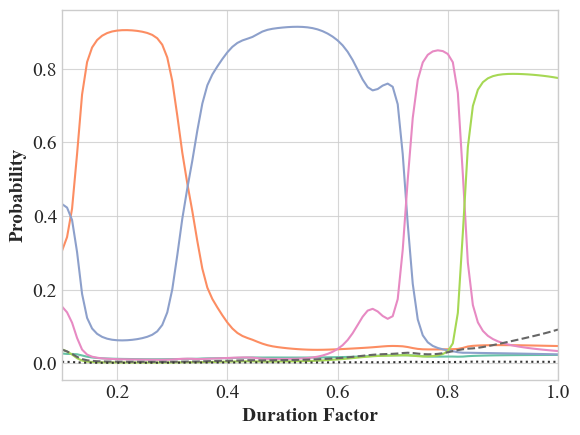

In [5]:
from PIL import Image
img = Image.open('./out/apples.png')
img.show()

## Counting Events

['', 'Question', ':', ' Alice', ' goes', ' to', ' the', ' shop', '.', ' She', ' buys', ' a', ' cart', 'on', ' of', ' milk', '.', ' She', ' buys', ' an', ' apple', '.', ' She', ' buys', ' a', ' potato', '.', ' She', ' buys', ' a', ' loaf', ' of', ' bread', '.', ' How', ' many', ' items', ' did', ' Alice', ' buy', '?', ' Reply', ' with', ' a', ' single', '-digit', ' number', '\n', 'Answer', ':', ' ']
9 33
[' She', ' buys', ' a', ' cart', 'on', ' of', ' milk', '.', ' She', ' buys', ' an', ' apple', '.', ' She', ' buys', ' a', ' potato', '.', ' She', ' buys', ' a', ' loaf', ' of', ' bread', '.']
{'0': [21026, 17416, 15500, 27309, 13679, 4364, 11209, 12226, 5067, 7699, 12166, 24222, 22679, 410, 7467, 21278, 6843, 1954, 17248, 128255, 11711, 128215, 22393, 16193, 10866, 128106, 9870, 2031, 23904, 128095, 27311, 18518, 7507, 13506, 20615, 128107, 13104, 12448, 17252, 20417, 19666, 7007, 22397, 16037, 21602, 128105, 18807, 128245, 13897, 17735, 15794, 13364, 25307, 22876, 26956, 12060, 1049, 2

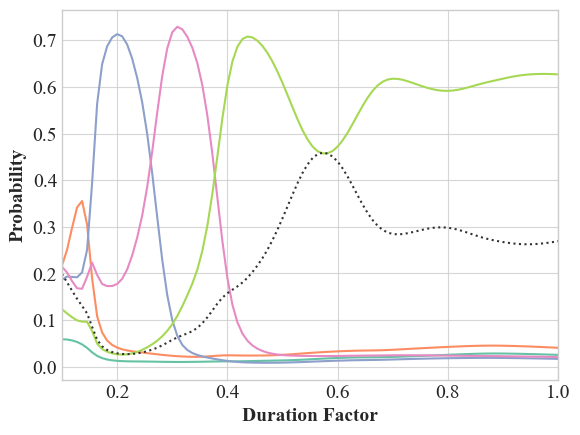

In [6]:
sentence = 'Question: Alice goes to the shop. She buys a carton of milk. She buys an apple. She buys a potato. She buys a loaf of bread. How many items did Alice buy? Reply with a single-digit number\nAnswer: '

shrink_start = 'She'
shrink_end = '.'

save_path = f'./out/counting_events'

num_events = 4

interesting_outputs = {}

for j in range(0, num_events + 1):
    interesting_outputs[str(j)] = str(j)

run_counting_experiment(current_model, current_tokenizer, sentence, None, shrink_start, shrink_end, interesting_outputs, save_path, 'Duration Factor', True)
img = Image.open('./out/counting_events.png')
img.show()

## Embedding Interpolation

{}
Attention scaling: 1.0
 Yes 0.25413641333580017
 Yes yes no No  True NO False true 

{}
Attention scaling: 1.0
 Yes 0.2535907030105591
 Yes yes no No  True NO False true 

{}
Attention scaling: 1.0
 Yes 0.252977192401886
 Yes yes no No  True NO False true 

{}
Attention scaling: 1.0
 Yes 0.2522992491722107
 Yes yes no No  True NO False true 

{}
Attention scaling: 1.0
 Yes 0.2515544891357422
 Yes yes no No  True NO False true 

{}
Attention scaling: 1.0
 Yes 0.2507413923740387
 Yes yes no No  True NO False true 

{}
Attention scaling: 1.0
 Yes 0.24986235797405243
 Yes yes no No  True NO False true 

{}
Attention scaling: 1.0
 Yes 0.2489180564880371
 Yes yes no No  True NO False true 

{}
Attention scaling: 1.0
 Yes 0.2479088306427002
 Yes yes no No  True NO False true 

{}
Attention scaling: 1.0
 Yes 0.24683628976345062
 Yes yes no No  True NO False true 

{}
Attention scaling: 1.0
 Yes 0.2457016408443451
 Yes yes no No  True NO False true 

{}
Attention scaling: 1.0
 Yes 0.24450737

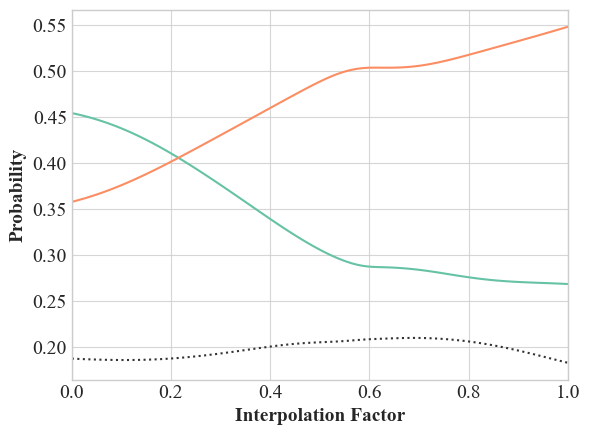

In [8]:
from continuity_tests.embedding_interpolation import run_embedding_interpolation_experiment

sentence = 'Question: Are [] red? (yes/no)\nAnswer:'

word_a = 'apples'
target_a = 'Yes'
prefix_a = 'yes'

word_b = 'bananas'
target_b = 'No'
prefix_b = 'no'

sentence_a = sentence.replace('[]', word_a)
sentence_b = sentence.replace('[]', word_b)

interesting_outputs = {
    target_a: [prefix_a],
    target_b: [prefix_b]
}
#assert False

#save_path = f'results/embedding_interpolation/{experiment_category}/{name}/{interpolation_technique}/embedding_interpolation-{model_name.lower().split("/")[1]}-{name}-{experiment_category}-{interpolation_technique}'

save_path = './out/interpolation'

run_embedding_interpolation_experiment(current_model, current_tokenizer, sentence_a, sentence_b, interesting_outputs, 'linear', save_path, 'Interpolation Factor', legend=True)
Image.open('./out/interpolation.png').show()

## Translation

['', 'Question', ':', ' Are', ' []', ' red', '?', ' (', 'yes', '/no', ')\n', 'Answer', ':']
Original input ids: torch.Size([13])
Position ids: tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])
{}
Attention scaling: 1.0
 yes 0.2706356644630432
Original input ids: torch.Size([13])
Position ids: tensor([ 1.1010,  2.1010,  3.1010,  4.1010,  5.1010,  6.1010,  7.1010,  8.1010,
         9.1010, 10.1010, 11.1010, 12.1010, 13.1010])
{}
Attention scaling: 1.0
 yes 0.27063602209091187
Original input ids: torch.Size([13])
Position ids: tensor([ 1.2020,  2.2020,  3.2020,  4.2020,  5.2020,  6.2020,  7.2020,  8.2020,
         9.2020, 10.2020, 11.2020, 12.2020, 13.2020])
{}
Attention scaling: 1.0
 yes 0.2706345021724701
Original input ids: torch.Size([13])
Position ids: tensor([ 1.3030,  2.3030,  3.3030,  4.3030,  5.3030,  6.3030,  7.3030,  8.3030,
         9.3030, 10.3030, 11.3030, 12.3030, 13.3030])
{}
Attention scaling: 1.0
 yes 0.2706358730792999
Original input ids: torch.S

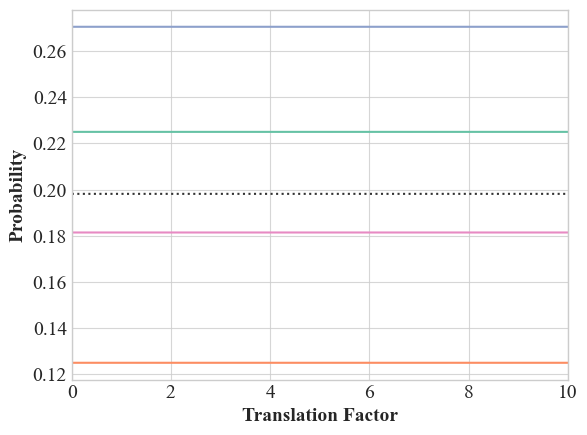

In [ ]:
from continuity_tests.translation import run_translation_experiment

sentence = 'The capital of France is'
save_path = './out/translation'
run_translation_experiment(current_model, current_tokenizer, sentence, 0.05, save_path, 'Translation Factor', True)
Image.open('./out/translation.png').show()

## Scaling

In [ ]:
from continuity_tests.scaling import run_scaling_experiment

sentence = 'The capital of France is'
run_scaling_experiment(current_model, current_tokenizer, sentence, 0.05, save_path, 'Scaling Factor', True)